In [2]:
! pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 23.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 32.4 MB/s eta 0:00:0000:0100:01


In [1]:
# import libraries
import os,sys

# Get 
current_dir=os.getcwd()
print(current_dir)

#Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)

#Insert the path to the parent directory
sys.path.insert(0,parent_dir)

/workspaces/Project_Week_8/notebooks
/workspaces/Project_Week_8


In [2]:
#import libraries
import pandas as pd
import numpy as np

# import functions/class
from scripts.load_data import read_csv_file
from scripts.merge_data import merge_fruad_data
from scripts.EDA import plot_histograms,bivariate_analysis,standard_scaling

In [3]:
# Load the dataset
os.chdir('../scripts')
file_path='../data/Fraud_Data.csv'
data=read_csv_file(file_path)
data.head(3)

Dataset loaded successfully from ../data/Fraud_Data.csv


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1


In [4]:
data.shape

(151112, 11)

In [5]:
# Load the dataset
os.chdir('../scripts')
file_path1='../data/creditcard.csv'
data1=read_csv_file(file_path1)
data1.head(3)

Dataset loaded successfully from ../data/creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
data1.shape

(284807, 31)

In [ ]:
# Load the dataset
os.chdir('../scripts')
file_path2='../data/IpAddress_to_Country.csv'
data2=read_csv_file(file_path2)
data2.head(3)

Dataset loaded successfully from ../data/IpAddress_to_Country.csv


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China


In [9]:
data2.shape

(138846, 3)

# Checking missing values

In [8]:
data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

# Data Cleaning

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.dtypes


user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [12]:
data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

# Exploratory Data Analysis (EDA)

Univariate analysis

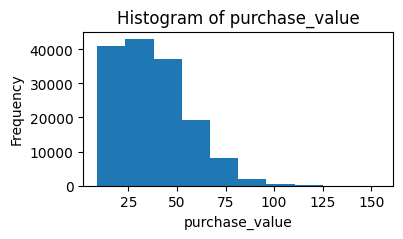

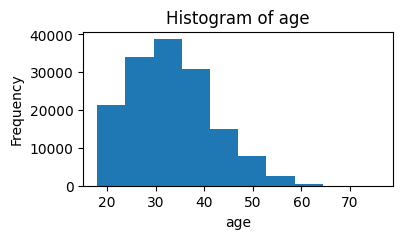

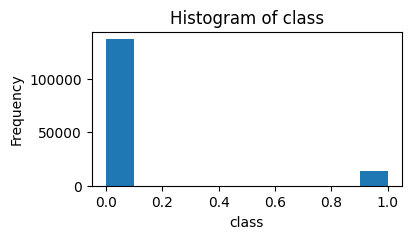

In [13]:
# Univariate analysis
numerical_columns = ['purchase_value', 'age', 'class']

plot_histograms(data, numerical_columns)

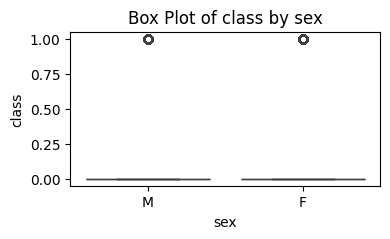

ANOVA F-statistic: 8.82
P-value: 0.003


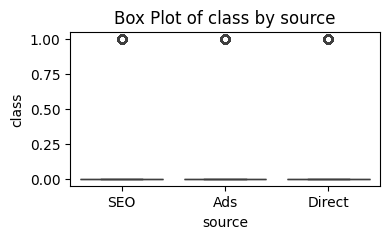

ANOVA F-statistic: 32.47
P-value: 0.000


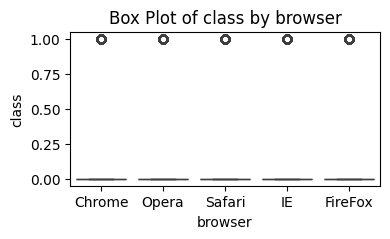

ANOVA F-statistic: 11.14
P-value: 0.000


In [14]:
bivariate_analysis(data, 'class', 'sex')  
bivariate_analysis(data, 'class', 'source') 
bivariate_analysis(data, 'class', 'browser')   

# Merge Datasets for Geolocation Analysis

In [15]:
data2['lower_bound_ip_address'] = pd.to_numeric(data2['lower_bound_ip_address'], errors='coerce').astype(np.int64)
data2['upper_bound_ip_address'] = pd.to_numeric(data2['upper_bound_ip_address'], errors='coerce').astype(np.int64)
data2['country'] = pd.to_numeric(data2['country'], errors='coerce').astype('str')

In [17]:
merged_data = merge_fruad_data(data, data2)

if merged_data is not None:
    print("\nMerged Data (first few rows):\n", merged_data.head())
    # You can now save the merged data to a new file:
    merged_data.to_csv("../data/merged_fraud_data.csv", index=False)
    print("Merged data saved to merged_fraud_data.csv")

An error occurred during the merging process: Incompatible merge dtype, dtype('O') and dtype('O'), both sides must have numeric dtype


In [17]:
data['signup_time'] = pd.to_datetime(data['signup_time'])
data['purchase_time'] = pd.to_datetime(data['purchase_time'])

In [18]:
# signup_time
data['signup_year'] = data['signup_time'].dt.year
data['signup_month'] =data['signup_time'].dt.month
data['signup_day'] = data['signup_time'].dt.day
data['signup_hour'] = data['signup_time'].dt.hour
# purchase_time
data['purchase_year'] = data['purchase_time'].dt.year
data['purchase_month'] =data['purchase_time'].dt.month
data['purchase_day'] = data['purchase_time'].dt.day
data['purchase_hour'] = data['purchase_time'].dt.hour

In [19]:
data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,signup_year,signup_month,signup_day,signup_hour,purchase_year,purchase_month,purchase_day,purchase_hour
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2015,2,24,22,2015,4,18,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,2015,6,7,20,2015,6,8,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2015,1,1,18,2015,1,1,18
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,2015,4,28,21,2015,5,4,13
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,2015,7,21,7,2015,9,9,18


In [20]:
data['signup_time'] = data['signup_time'].astype(np.int64)
data['purchase_time'] = data['purchase_time'].astype(np.int64)

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()
data['device_id'] = encoder.fit_transform(data['device_id']) # Fit and transform on the column
data['source'] = encoder.fit_transform(data['source'])
data['browser'] = encoder.fit_transform(data['browser'])
data['sex'] = encoder.fit_transform(data['sex'])


# Standard Scaling

In [23]:
standard_scaled_data = standard_scaling(data)

print("Original Data:\n", data)
print("\nStandard Scaled Data:\n", standard_scaled_data)

Original Data:
         user_id          signup_time        purchase_time  purchase_value  \
0         22058  1424818549000000000  1429325231000000000              34   
1        333320  1433709590000000000  1433727534000000000              16   
2          1359  1420138364000000000  1420138365000000000              15   
3        150084  1430255605000000000  1430747690000000000              44   
4        221365  1437462592000000000  1441824053000000000              39   
...         ...                  ...                  ...             ...   
151107   345170  1422327814000000000  1427589047000000000              43   
151108   274471  1431711809000000000  1432643079000000000              35   
151109   368416  1425424051000000000  1432105667000000000              40   
151110   207709  1436472367000000000  1441618486000000000              46   
151111   138208  1433919740000000000  1437444233000000000              20   

        device_id  source  browser  sex  age    ip_address 

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop(['class'],axis=1)

y = data['class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state=2,
                                    test_size=0.35)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler 

In [28]:
LR_model = LogisticRegression(max_iter=1000, solver='liblinear') 
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [29]:
# Make predictions on the test set
y_pred = LR_model.predict(X_test)

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9056910569105691


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     47902
           1       0.00      0.00      0.00      4988

    accuracy                           0.91     52890
   macro avg       0.45      0.50      0.48     52890
weighted avg       0.82      0.91      0.86     52890



/workspaces/Project_Week_8/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/Project_Week_8/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/Project_Week_8/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier 

In [33]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)  
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = RF_model.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.955946303649083


In [36]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     47902
           1       0.99      0.54      0.70      4988

    accuracy                           0.96     52890
   macro avg       0.97      0.77      0.84     52890
weighted avg       0.96      0.96      0.95     52890



# ■	Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
GBC_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [39]:
# Make predictions on the test set
y_pred = GBC_model.predict(X_test)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9552467385138967


In [41]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     47902
           1       0.97      0.54      0.69      4988

    accuracy                           0.96     52890
   macro avg       0.96      0.77      0.84     52890
weighted avg       0.96      0.96      0.95     52890



# ■	Multi-Layer Perceptron 

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
MLP_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)  # Adjust parameters
MLP_model.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [44]:
#Make predictions on the test set
y_pred = MLP_model.predict(X_test)

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9056910569105691


In [46]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     47902
           1       0.00      0.00      0.00      4988

    accuracy                           0.91     52890
   macro avg       0.45      0.50      0.48     52890
weighted avg       0.82      0.91      0.86     52890



/workspaces/Project_Week_8/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/Project_Week_8/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/Project_Week_8/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier  

In [48]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.905331820760068


In [51]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     47902
           1       0.50      0.57      0.53      4988

    accuracy                           0.91     52890
   macro avg       0.73      0.75      0.74     52890
weighted avg       0.91      0.91      0.91     52890



# Model Explainability

In [52]:
import numpy 
import shap 

/workspaces/Project_Week_8/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
explainer = shap.TreeExplainer(RF_model)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[0,:], matplotlib=True)

In [ ]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
# Dependence plot (relationship between a single feature and the target variable)
shap.dependence_plot("feature_name", shap_values[1], X_test)

In [ ]:
# Waterfall plot (for individual predictions)
shap.waterfall_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[0,:])